In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor,LinearRegression

In [2]:
#importing the dataset
df1 = pd.read_csv('kin-32fm.csv')
df1.describe()

,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,alpha1,alpha2,...,a8,d1,d2,d3,d4,d5,d6,d7,d8,y
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,...,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000
mean,-0.000355,0.001292,0.001170,-0.001491,0.000400,0.000572,0.000235,-0.000720,0.000192,0.006376,...,0.211359,0.147800,0.149082,0.149806,0.150975,0.150581,0.148654,0.150665,0.148251,1.800938
std,0.182322,0.180830,0.181815,0.183597,0.180371,0.181936,0.182643,0.181537,0.321380,0.321990,...,0.137429,0.150246,0.150367,0.150253,0.150391,0.150488,0.150304,0.150460,0.150515,0.395336
min,-0.314100,-0.314117,-0.314082,-0.314127,-0.314135,-0.314110,-0.314116,-0.314031,-0.392699,-0.392699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366801
25%,-0.157064,-0.154740,-0.158420,-0.161679,-0.154140,-0.158087,-0.156950,-0.157968,-0.392699,-0.392699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.533121
50%,-0.004563,0.003349,0.004674,-0.002177,0.000607,0.002037,-0.001178,-0.003387,0.000000,0.000000,...,0.292031,0.000000,0.000000,0.000000,0.266808,0.259524,0.000000,0.264788,0.000000,1.808037
75%,0.161290,0.158190,0.158474,0.159908,0.156626,0.155948,0.160228,0.156914,0.392699,0.392699,...,0.305363,0.299725,0.299753,0.299873,0.300184,0.300504,0.299939,0.300166,0.300057,2.075908
max,0.314021,0.314071,0.314062,0.314158,0.314159,0.314150,0.314126,0.313977,0.392699,0.392699,...,0.351547,0.359897,0.343076,0.356919,0.358765,0.345783,0.361700,0.347777,0.349389,3.077484


In [4]:
#Hold Out Method
#spliting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#Cross Validation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
scores = []
best_model = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    scores.append(best_model.score(X_test, y_test))

(4915, 32)
(3277, 32)
(4915,)
(3277,)


In [3]:
#spliting data into x and y
x=df1.drop(['y'],axis=1)
y=df1['y']
print(x.shape)
print(y.shape)

(8192, 32)
(8192,)


In [5]:
#creating SGDRegressor model using sklearn
model_1 = SGDRegressor()
model_1.fit(x_train,y_train)
y1_predict = model_1.predict(x_test)

/Users/nikhilr/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


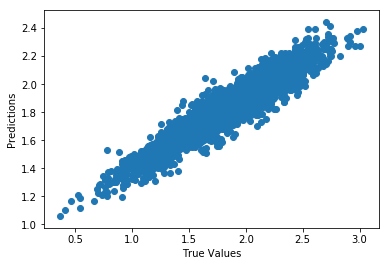

In [6]:
#plotting the predictions and test data using scatter plot
plt.scatter(y_test, y1_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [7]:
#accuracy score of the SGDRegressor model
print(model_1.score(x_test, y_test))

0.7038631599683277


In [8]:
#creating LinearRegression model
model_2 = LinearRegression()
model_2.fit(x_train,y_train)
#predicting the test data
y2_predict = model_2.predict(x_test)

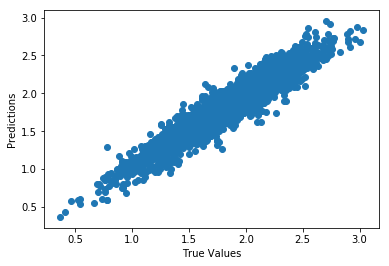

In [9]:
#plotting the predictions and test data using scatter plot
plt.scatter(y_test, y2_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [10]:
#accuracy score of the LinearRegression model
print(model_2.score(x_test, y_test))

0.9059904164242791
